In [35]:
#Adding dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import g_key
import pycountry
import requests
import json
import gmaps
from scipy.stats import linregress

In [23]:
covid_data=pd.read_csv("data/worldometer_coronavirus_daily_data.csv")

In [22]:
uk_covid=covid_data[covid_data["country"]=="UK"]
uk_covid.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
136023,2020-2-15,UK,9.0,NaN,1.0,0.0,NaN
136024,2020-2-16,UK,9.0,0.0,1.0,0.0,NaN
136025,2020-2-17,UK,9.0,0.0,1.0,0.0,NaN
136026,2020-2-18,UK,9.0,0.0,1.0,0.0,NaN
136027,2020-2-19,UK,9.0,0.0,1.0,0.0,NaN


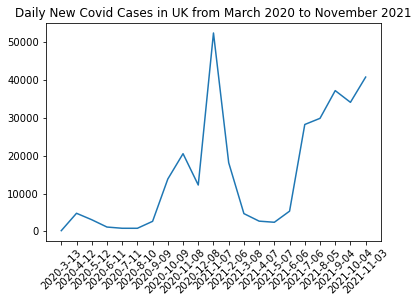

In [29]:
uk_covid2 = uk_covid[uk_covid.index % 30== 0]
date=uk_covid2["date"]
daily_new_cases=uk_covid2["daily_new_cases"]
plt.plot(date, daily_new_cases)
plt.title("Daily New Covid Cases in UK from March 2020 to November 2021")
plt.xticks(rotation=45)
plt.show()

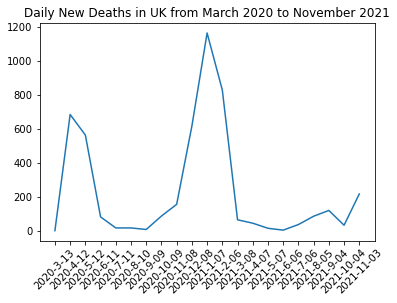

In [28]:
daily_new_deaths=uk_covid2["daily_new_deaths"]
date=uk_covid2["date"]
plt.plot(date, daily_new_deaths)
plt.title("Daily New Deaths in UK from March 2020 to November 2021")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Daily new deaths')

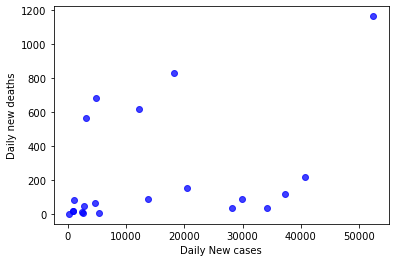

In [39]:
plt.scatter(daily_new_cases,daily_new_deaths, marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Daily New cases")
plt.ylabel("Daily new deaths")

The r-squared is: 0.13382632711853648


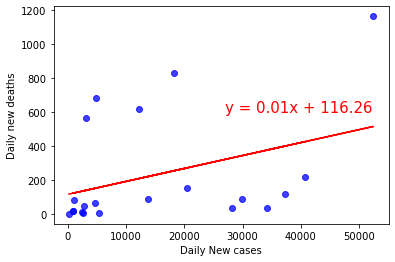

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(daily_new_cases, daily_new_deaths)
regress_values=daily_new_cases*slope+intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(daily_new_cases,daily_new_deaths, marker="o", facecolors="blue", alpha=0.75)
plt.plot(daily_new_cases,regress_values,"r-")
plt.annotate(line_eq,(27000,600),fontsize=15, color="red")
plt.xlabel("Daily New cases")
plt.ylabel("Daily new deaths")
print(f"The r-squared is: {rvalue**2}")

In [ ]:
covid_summary=pd.read_csv("data/worldometer_coronavirus_summary_data.csv")
uk_summary=covid_summary[covid_summary["country"]=="UK"]
uk_covid=uk_summary[["total_confirmed","total_deaths","total_recovered"]]
uk_covid

In [ ]:
uk_chart = uk_covid.plot(kind="bar", title="UK Covid summary")
uk_chart.set_ylabel("Number of cases")
plt.show()
plt.tight_layout()

In [ ]:
#importing data set
vaccine_data=pd.read_csv("data/country_vaccinations.csv")
vaccine_data.head()

In [ ]:
uk=vaccine_data[vaccine_data["country"]=="England"]
uk.head() 

In [ ]:
uk_fully_vacc=uk["people_fully_vaccinated"]
uk_date=uk["date"]
x_axis=uk_date
plt.scatter(x_axis, uk_fully_vacc, marker="o")

In [ ]:
kenya=vaccine_data[vaccine_data["country"]=="Kenya"]
kenya_fully_vacc=kenya["people_fully_vaccinated"]
kenya_date=kenya["date"]
x_axis=kenya_date
plt.scatter(x_axis, kenya_fully_vacc, marker="o")